In [8]:
import cv2
import numpy as np 
from glob import glob 
from helpers import *
from matplotlib import pyplot as plt 

In [39]:
class BOV:
    def __init__(self, no_clusters):
        self.no_clusters = no_clusters
        self.train_path = None
        self.test_path = None
        self.im_helper = ImageHelpers()
        self.bov_helper = BOVHelpers(no_clusters)
        self.file_helper = FileHelpers()
        self.images = None
        self.trainImageCount = 0
        self.train_labels = np.array([])
        self.name_dict = {}
        self.descriptor_list = []

    def trainModel(self):
        """
        This method contains the entire module 
        required for training the bag of visual words model

        Use of helper functions will be extensive.

        """

        # read file. prepare file lists.
        self.images, self.trainImageCount = self.file_helper.getFiles(self.train_path)
        # extract SIFT Features from each image
        label_count = 0 
        for word, imlist in self.images.items():
            self.name_dict[str(label_count)] = word
            print ("Computing Features for ", word)
            for im in imlist:
                # cv2.imshow("im", im)
                # cv2.waitKey()
                self.train_labels = np.append(self.train_labels, label_count)
                kp, des = self.im_helper.features(im)
                self.descriptor_list.append(des)

            label_count += 1


        # perform clustering
        bov_descriptor_stack = self.bov_helper.formatND(self.descriptor_list)
        self.bov_helper.cluster()
        self.bov_helper.developVocabulary(n_images = self.trainImageCount, descriptor_list=self.descriptor_list)

        # show vocabulary trained
        # self.bov_helper.plotHist()
 

        self.bov_helper.standardize()
        self.bov_helper.train(self.train_labels)


    def recognize(self,test_img, test_image_path=None):

        """ 
        This method recognizes a single image 
        It can be utilized individually as well.


        """

        kp, des = self.im_helper.features(test_img)
        # print kp
        print (des.shape)

        # generate vocab for test image
        vocab = np.array( [[ 0 for i in range(self.no_clusters)]])
        # locate nearest clusters for each of 
        # the visual word (feature) present in the image
        
        # test_ret =<> return of kmeans nearest clusters for N features
        test_ret = self.bov_helper.kmeans_obj.predict(des)
        # print test_ret

        # print vocab
        for each in test_ret:
            vocab[0][each] += 1

        print (vocab)
        # Scale the features
        vocab = self.bov_helper.scale.transform(vocab)

        # predict the class of the image
        lb = self.bov_helper.clf.predict(vocab)
        # print "Image belongs to class : ", self.name_dict[str(int(lb[0]))]
        return lb



    def testModel(self):
        """ 
        This method is to test the trained classifier

        read all images from testing path 
        use BOVHelpers.predict() function to obtain classes of each image

        """

        self.testImages, self.testImageCount = self.file_helper.getFiles(self.test_path)

        predictions = []

        for word, imlist in self.testImages.items():
            print ("processing " ,word)
            for im in imlist:
                
                cl = self.recognize(im)
                print( cl)
                predictions.append({
                    'image':im,
                    'class':cl,
                    'object_name':self.name_dict[str(int(cl[0]))]
                    })

        print ("pred",predictions)
        for each in predictions:
            # cv2.imshow(each['object_name'], each['image'])
            # cv2.waitKey()
            # cv2.destroyWindow(each['object_name'])
            # 
            plt.imshow(cv2.cvtColor(each['image'], cv2.COLOR_GRAY2RGB))
            plt.title(each['object_name'])
            plt.show()


    def print_vars(self):
        pass

    
    
    
    


In [40]:
bov = BOV(no_clusters=100)
bov.train_path="images/train/"

In [41]:
bov.test_path="images/test"

In [42]:
bov.trainModel()

 #### Reading image category  train\accordion  ##### 
Reading file  images/train\accordion\image_0001.jpg
Reading file  images/train\accordion\image_0002.jpg
Reading file  images/train\accordion\image_0003.jpg
Reading file  images/train\accordion\image_0007.jpg
Reading file  images/train\accordion\image_0008.jpg
Reading file  images/train\accordion\image_0009.jpg
Reading file  images/train\accordion\image_0010.jpg
Reading file  images/train\accordion\image_0011.jpg
Reading file  images/train\accordion\image_0012.jpg
Reading file  images/train\accordion\image_0013.jpg
Reading file  images/train\accordion\image_0014.jpg
Reading file  images/train\accordion\image_0016.jpg
Reading file  images/train\accordion\image_0018.jpg
Reading file  images/train\accordion\image_0021.jpg
Reading file  images/train\dollar_bill\image_0001.jpg
Reading file  images/train\dollar_bill\image_0002.jpg
Reading file  images/train\dollar_bill\image_0003.jpg
Reading file  images/train\dollar_bill\image_0007.jpg
Re

 #### Reading image category  train\Soccer_Ball  ##### 
Reading file  images/train\accordion\image_0001.jpg
Reading file  images/train\accordion\image_0002.jpg
Reading file  images/train\accordion\image_0003.jpg
Reading file  images/train\accordion\image_0007.jpg
Reading file  images/train\accordion\image_0008.jpg
Reading file  images/train\accordion\image_0009.jpg
Reading file  images/train\accordion\image_0010.jpg
Reading file  images/train\accordion\image_0011.jpg
Reading file  images/train\accordion\image_0012.jpg
Reading file  images/train\accordion\image_0013.jpg
Reading file  images/train\accordion\image_0014.jpg
Reading file  images/train\accordion\image_0016.jpg
Reading file  images/train\accordion\image_0018.jpg
Reading file  images/train\accordion\image_0021.jpg
Reading file  images/train\dollar_bill\image_0001.jpg
Reading file  images/train\dollar_bill\image_0002.jpg
Reading file  images/train\dollar_bill\image_0003.jpg
Reading file  images/train\dollar_bill\image_0007.jpg


C:\Users\Amamphiswana\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


Vocabulary Histogram Generated
Training SVM
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Train labels [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3.]
Training completed


 #### Reading image category  images\test  ##### 
Reading file  images/test\accordian\image_0023.jpg
Reading file  images/test\accordian\image_0026.jpg
Reading file  images/test\dollar_bill\image_0040.jpg
Reading file  images/test\dollar_bill\image_0048.jpg
Reading file  images/test\motorbike\image_0030.jpg
Reading file  images/test\motorbike\image_0044.jpg
Reading file  images/test\Soccer_Ball\image_0032.jpg
Reading file  images/test\Soccer_Ball\image_0046.jpg
processing  images\test
(489, 128)
[[23  4  1  3  0  2  7  6  4  1  4  4  4  9  3  5 13  1 22  0  6  5  0  0
   5  4  8 36  0  5  1  5  5  1  9  3  4  1  2  5  0  2  2 10  6  2  4  4
   5  7  1  8  6  7  4  0  9  4  1  5  3  0 10  2  3  2  4 12 10  6  4  2
   3  2  5  1  2  7  0  6  3  3  1  2  3  6  2  4 23  4  8  4  2  2  3  5
  13  1  2  6]]
[3.]


C:\Users\Amamphiswana\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(833, 128)
[[  8  35   1   5  53   2   7   6   1   1   6   4   8  28  27   6  10   7
    8   4   5   2   1  24   0   2   2   9 101   6  10  14   6   5  13   2
   10  34   0   2   8   1   2   6  19  21   3   3   4   1   6   1   0   2
    1   0   9   5  13   3   5   2  13   9   8  10   5   0   5   4  14   8
    1  24   1   1   2   0  46   5   2   2   9  12   5   1   0   2   7   8
    3   2   6   1   5  12   1   3   2   4]]
[0.]
(514, 128)
[[ 1  1  4  5  1  7  3  3  2  3  5  3 10  8  4  4  2  1  9  2  3  1  1  0
   6  6  3  9  2  6 16  2  8  6  6 14  4  6  1  5  4  7  3  8  5 12 11  9
   5  1  2  2 16  5  1  4  9 10  3  8 22  7 20  4  8  3  1  2  4  6  2  4
   0  0  2  5  5  4  0 12  3  5  5 10  1  3  4  2  1  6  5 13  4  0  6  7
   3 12  3  2]]
[3.]
(418, 128)
[[ 0  2  0  6 32  2  0  6  2  2 11  1  2  1  2  2  6  2 15  1  5  2  0  0
   0  4  1  4  5  3  2  6 10 26  2  1  0  3  0  0  4  4  0 13  1  8  0  0
   0  2  1  3  6  2  3  8  4 11  9 14 10  3 10  2  8  4  1  2  1 21  9  0
   0  4  

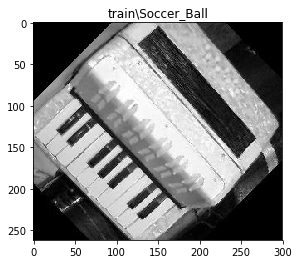

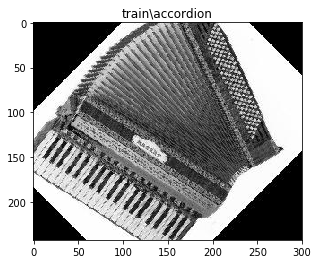

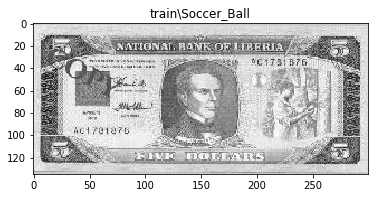

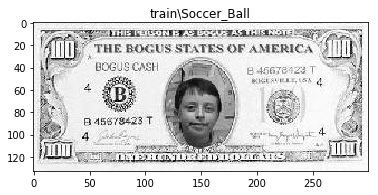

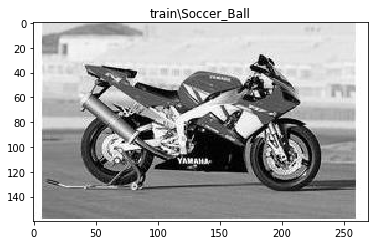

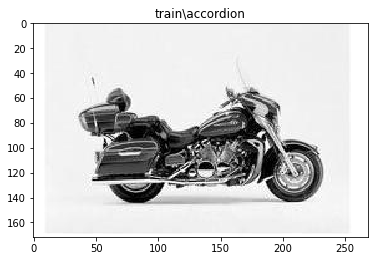

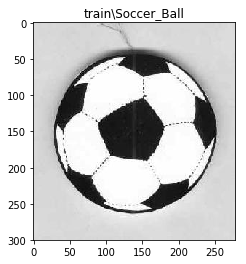

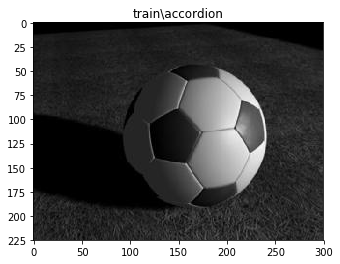

In [43]:
 bov.testModel()